In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers, MovieWriter
import matplotlib.animation as animation
import time
from matplotlib.patches import Wedge
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from itertools import chain

In [2]:
predictions0 = np.load('res0.npy')

predictions1 = np.load('res1.npy')
predictions2 = np.load('res2.npy')

predictions = [predictions0, predictions1, predictions2]

In [3]:
predictions1.shape

(201, 401, 10, 2)

In [4]:
tables = np.load('static_obs_states.npy')

In [5]:
humans = np.load('dynamic_obs_states.npy')

In [6]:
human_controls = np.load('dynamic_obs_controls.npy')

In [7]:
humans[-1, 0, :, 3:]

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.59999845e-01,  4.70882325e-02],
       [ 1.59999945e-01,  8.64453003e-02],
       [ 1.59999945e-01,  1.18711239e-01],
       [ 1.59999944e-01,  1.44526175e-01],
       [ 1.59999944e-01,  1.64521037e-01],
       [ 1.59999944e-01,  1.79311057e-01],
       [ 1.59999944e-01,  1.89490123e-01],
       [ 1.59999944e-01,  1.95624658e-01],
       [ 1.59999944e-01,  1.98250366e-01],
       [ 1.59999943e-01,  1.97870235e-01],
       [ 1.59999943e-01,  1.94950871e-01],
       [ 1.59999943e-01,  1.89922165e-01],
       [ 1.59999943e-01,  1.83176591e-01],
       [ 1.59999942e-01,  1.75069530e-01],
       [ 1.59999942e-01,  1.65919892e-01],
       [ 1.59999942e-01,  1.56010883e-01],
       [ 1.59999941e-01,  1.45591678e-01],
       [ 1.59999941e-01,  1.34879568e-01],
       [ 1.59999940e-01,  1.24060981e-01],
       [ 1.59999940e-01,  1.13295579e-01],
       [ 1.59999939e-01,  1.02715567e-01],
       [ 1.59999939e-01,  9.24303979e-02],
       [ 1.

In [8]:
tables.shape

(100, 4, 2)

In [13]:
task = tables.shape[0]  - 1

In [14]:
traj_len, pred_len, n_pred, _ = predictions[0].shape

In [23]:

for t in range(traj_len):
    print('t:{}'.format(t))
    print(predictions[t, 3, :, :2])

t:0


TypeError: list indices must be integers or slices, not tuple

In [15]:
table_pos = tables[task, :, :]
trajectory = humans[task, 0, :, :]

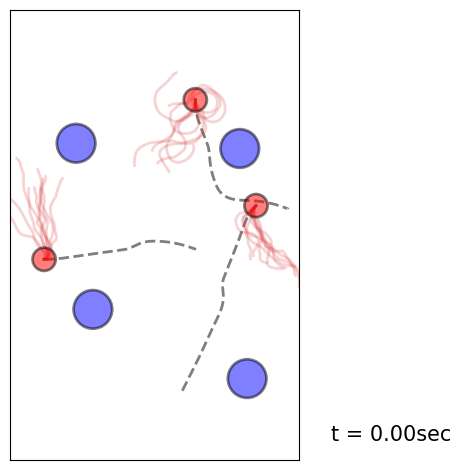

In [16]:
path = '~/anaconda3/bin/ffmpeg'
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
writer = writers['ffmpeg'](fps=10)

fig, ax = plt.subplots()

ax.set_xlim(-2.5, 2.0)
ax.set_ylim(-3.5, 3.5)
ax.set_aspect('equal')

ax.set_xticks([])
ax.set_yticks([])

real_trajs = []
for _ in range(3):
    # ongoing trajectories of dynamic obstacles
    line, = ax.plot([], [], linestyle='dashed', linewidth=2, color='tab:grey', zorder=1)
    real_trajs.append(line)
    
    
    
# tables
for i in range(4):
    obstacle = plt.Circle(table_pos[i],
                          .3,
                          ec=(0., 0., 0., 0.5),
                          fc=(0., 0., 1., 0.5),
                          lw=2,
                          )
    ax.add_artist(obstacle)

timestep = ax.text(2.5, -3.2, '', fontsize=15)

pred_trajs0 = []
for _ in range(n_pred):
    line, = ax.plot([], [], linestyle='solid', linewidth=2, color='tab:red', alpha=0.2, zorder=1)
    pred_trajs0.append(line)
    
pred_trajs1 = []
for _ in range(n_pred):
    line, = ax.plot([], [], linestyle='solid', linewidth=2, color='tab:red', alpha=0.2, zorder=1)
    pred_trajs1.append(line)
    
pred_trajs2 = []
for _ in range(n_pred):
    line, = ax.plot([], [], linestyle='solid', linewidth=2, color='tab:red', alpha=0.2, zorder=1)
    pred_trajs2.append(line)

prev_people = []
    
preds = [pred_trajs0, pred_trajs1, pred_trajs2]
    
def func(t):
    
    for i, line in enumerate(real_trajs):
        line.set_data(humans[task, i, t:, 0], humans[task, i, t:, 1])
    
    for p_fig in list(prev_people):
                    p_fig.remove()
                    prev_people.remove(p_fig)
                
    for i in range(3):
        
        p_fig = ax.add_artist(plt.Circle(humans[task, i, t],
                                         .18, ec=(0., 0., 0., 0.5),
                                         fc=(1., 0., 0., 0.5),
                                         lw=2, zorder=2))
        prev_people.append(p_fig)

    
    for j, pred_t in enumerate(preds):
        for i, line in enumerate(pred_t):
            p = predictions[j]
            line.set_data(p[t, :, i, 0], p[t, :, i, 1])
        
        
    
    timestep.set_text('t = {:.2f}sec'.format(t * .1))
    
fig.tight_layout()
    
ani = FuncAnimation(fig=fig, func=func, frames=traj_len)
ani.save('vid7.mp4'.format(time.strftime("%m%d-%H%M%S")), writer=writer, dpi=100)